# Analysis of Appendix B.3.2

In [1]:
library(dplyr)
library(ggplot2)
library(ggpubr)
source("helper.r")
theme_set(theme_pubr(legend = "none"))

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ggpubr' was built under R version 3.6.3"Warning message:
"package 'plot3D' was built under R version 3.6.3"Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



### Data Preparation 

In [2]:
# path to folder, with folders for dataset results
path = "../data/mlp_eval/"
datasets = list.files(path)

# create list with one list containing one dataframe per dataset
data.list = lapply(datasets, function(data){
  
  data.path = paste0(path, data, "/")
  objectives = list.files(data.path)
  
  for(i in 1:length(objectives)){
 
    res = readRDS(paste0(data.path, objectives[i]))
    df.sub = res$result[[1]]$eval
    df.sub$objective = res$objective
    
    if(i == 1) df = df.sub
    else df = rbind(df, df.sub)
  }
  
  return(df)
})
names(data.list) = datasets

In [14]:
# analysis of confidence improvement
df.datasets.conf = create_table_datasets(data.list, "SS_L2", "conf.rel", 7)
df.feat.low      = as.data.frame(df.datasets.conf %>% group_by(feature.1) %>% summarise(n()))
df.feat.high     = as.data.frame(df.datasets.conf %>% group_by(feature) %>% summarise(n()))
df.feat.conf     = left_join(df.feat.high, df.feat.low, by = c("feature"= "feature.1"))

df.datasets.conf[,c("mean","sd","mean.1", "mean.2")] = round(df.datasets.conf[,c("mean","sd","mean.1", "mean.2")]*100,0)
names(df.datasets.conf)[4:7] = c("feat.high", "mean.high", "feat.low", "mean.low")
df.datasets.conf[,c(1:3,5,7)]

dataset,mean,sd,mean.high,mean.low
adult,34,6,38,25
airlines,49,20,61,3
albert,57,26,78,14
Amazon_employee_access,58,17,69,21
APSFailure,46,17,60,22
Australian,41,7,46,32
bank-marketing,29,13,45,15
blood-transfusion-service-center,34,20,39,13
car,44,17,51,32
christine,47,14,54,19


In [15]:
# analysis of neg loglik improvement
df.datasets.nll  = create_table_datasets(data.list, "SS_L2", "neg_loglik.rel", 7)
df.feat.low      = as.data.frame(df.datasets.nll %>% group_by(feature.1) %>% summarise(n()))
df.feat.high     = as.data.frame(df.datasets.nll %>% group_by(feature) %>% summarise(n()))
df.feat.nll      = left_join(df.feat.high, df.feat.low, by = c("feature"= "feature.1"))

df.datasets.nll[,c("mean","sd","mean.1", "mean.2")] = round(df.datasets.nll[,c("mean","sd","mean.1", "mean.2")]*100,0)
names(df.datasets.nll)[4:7] = c("feat.high", "mean.high", "feat.low", "mean.low")
df.datasets.nll[,c(1:3,5,7)]





dataset,mean,sd,mean.high,mean.low
adult,13,6,23,8
airlines,17,9,23,1
albert,31,13,40,6
Amazon_employee_access,0,36,29,-35
APSFailure,15,7,23,6
Australian,12,14,23,-4
bank-marketing,7,9,17,-1
blood-transfusion-service-center,6,17,10,-8
car,26,32,35,10
christine,10,11,17,1


In [17]:
df.feat = left_join(df.feat.conf, df.feat.nll, by = "feature")
df.feat

feature,n().x.x,n().y.x,n().x.y,n().y.y
batch_size,1,3,3,4
learning_rate,6,2,6,3
max_dropout,9,1,2,1
max_units,4,NA,7,NA
momentum,8,NA,7,3
num_layers,3,14,9,11
weight_decay,4,15,1,13


In [14]:
data_combined = do.call("rbind", data.list)
data_combined = data_combined[data_combined$objective %in% c("SS_L2", "SS_area", "SS_sd"),]


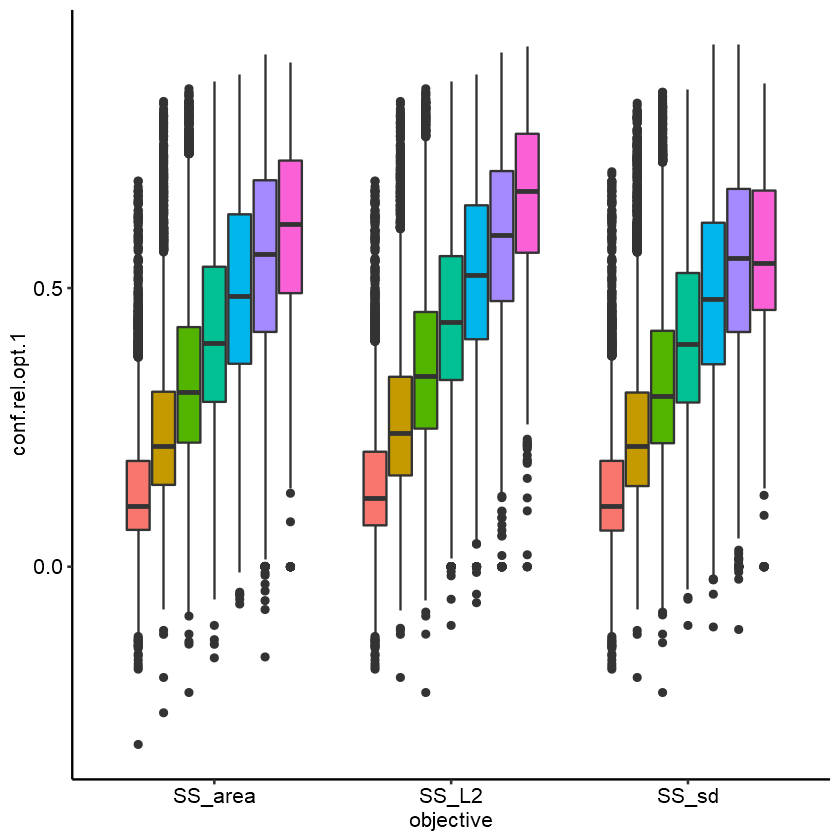

In [15]:
library(ggplot2)
ggplot(data_combined, aes(x = objective, y = conf.rel.opt.1)) + 
geom_boxplot(aes(fill = as.factor(depth)))  

In [20]:
test1 = create_table_features(data.list = data.list, objective = "SS_L2", target = "neg_loglik.rel", depth = 7)[,1:2]
test2 = create_table_features(data.list = data.list, objective = "SS_area", target = "neg_loglik.rel", depth = 7)[,1:2]
test3 = create_table_features(data.list = data.list, objective = "SS_sd", target = "neg_loglik.rel", depth = 7)[,1:2]
left_join(left_join(test1, test2, by = "feature"), test3, by = "feature")

feature,mean.feat.x,mean.feat.y,mean.feat
batch_size,0.1981016,0.1923348,0.1572165
learning_rate,0.1788621,0.1793516,0.1750975
max_dropout,0.1740855,0.1754420,0.1677193
max_units,0.2462329,0.2407848,0.2479464
momentum,0.1972032,0.2035430,0.2022457
num_layers,0.1383330,0.1533407,0.1526577
weight_decay,0.1194863,0.1156474,0.1112226
